In [7]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer 
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity as cs
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.display import display

In [8]:
df1=pd.read_csv("/content/amz_com-ecommerce_sample.csv",encoding= 'unicode_escape',engine='python')
df2=pd.read_csv("/content/flipkart_com-ecommerce_sample.csv",encoding= 'unicode_escape',engine='python')

In [9]:
df1.head(10)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982,438,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32143,29121,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,991,551,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,694,325,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,208,258,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,427,473,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name..."
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1198,602,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
7,8542703ca9e6ebdf6d742638dfb1f2ca,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGYGHFUEXN,32137,28664,"[""http://img6a.flixcart.com/image/sofa-bed/e/x...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
8,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,682,385,"[""http://img6a.flixcart.com/

In [10]:
df2.head(10)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name..."
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
7,8542703ca9e6ebdf6d742638dfb1f2ca,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGYGHFUEXN,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/e/x...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
8,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,699.0,

In [11]:
df1.shape

(20000, 15)

In [12]:
df2.shape

(20000, 15)

In [13]:
df1.describe()

,retail_price,discounted_price
count,20000.000000,20000.00000
mean,2957.095150,2364.59705
std,8993.993257,8994.62368
min,-20.000000,0.00000
25%,647.000000,424.00000
50%,999.000000,663.00000
75%,1986.000000,1235.00000
max,571223.000000,726879.00000


In [14]:
df2.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [15]:
#checking for null values
df1.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                  0
discounted_price              0
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [16]:
#checking for null values
df2.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   uniq_id                  20000 non-null  object
 1   crawl_timestamp          20000 non-null  object
 2   product_url              20000 non-null  object
 3   product_name             20000 non-null  object
 4   product_category_tree    20000 non-null  object
 5   pid                      20000 non-null  object
 6   retail_price             20000 non-null  int64 
 7   discounted_price         20000 non-null  int64 
 8   image                    19997 non-null  object
 9   is_FK_Advantage_product  20000 non-null  bool  
 10  description              19998 non-null  object
 11  product_rating           20000 non-null  object
 12  overall_rating           20000 non-null  object
 13  brand                    14136 non-null  object
 14  product_specifications   19986 non-nul

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [19]:
df1['retail_price'] = df1['retail_price'].astype(float)
df1['discounted_price'] = df1['discounted_price'].astype(float)

In [20]:
#replacing null values with median
df2["retail_price"].fillna(df2["retail_price"].median(),inplace=True)
df2["discounted_price"].fillna(df2["discounted_price"].median(),inplace=True)

In [21]:
df2.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                  0
discounted_price              0
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [22]:
df2.describe()

,retail_price,discounted_price
count,20000.000000,20000.000000
mean,2971.643200,1967.850500
std,8992.864824,7319.808549
min,35.000000,35.000000
25%,675.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


## Let us do some Exploratory Data Analysis to interpret visual meaning

In [23]:
df1['crawl_timestamp']=pd.to_datetime(df1['crawl_timestamp'])

In [24]:
df1['crawl_year']=df1['crawl_timestamp'].apply(lambda x :x.year)
df1['crawl_month']=df1['crawl_timestamp'].apply(lambda x :x.month)

In [25]:
df1.product_category_tree[0]

'["Clothing >> Women\'s Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women\'s Cycling Shorts"]'

In [26]:
df1.product_category_tree[0].split('>>')[0][2:].strip('[]"').strip()

'Clothing'

In [27]:
df1['MainCategory'] = df1['product_category_tree'].apply(lambda x: x.split('>>')[0][2:].strip('[]"').strip())

In [28]:
df1.head(10)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,crawl_year,crawl_month,MainCategory
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982.0,438.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32143.0,29121.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016,3,Furniture
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,991.0,551.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,Footwear
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,694.0,325.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,208.0,258.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016,3,Pet Supplies
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23+00:00,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,427.0,473.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name...",2016,3,Eternal Gandhi Super Series Crystal Paper Weig...
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1198.0,602.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing
7,8542703ca9e6ebdf6d742638dfb1f2ca,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGYGHFUEXN,32137.0,28664.0,"[""http://img6a.flixcart.com/image/sofa-bed/e/x...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016,3,Furniture
8,29c8d290caa451f97b1c32df64

In [29]:
df1.crawl_month.unique()

array([ 3,  1,  5,  6,  4, 12,  2])

crawl_month
1      4850
2       245
3      1634
4      1137
5       773
6      1046
12    10315
Name: crawl_month, dtype: int64


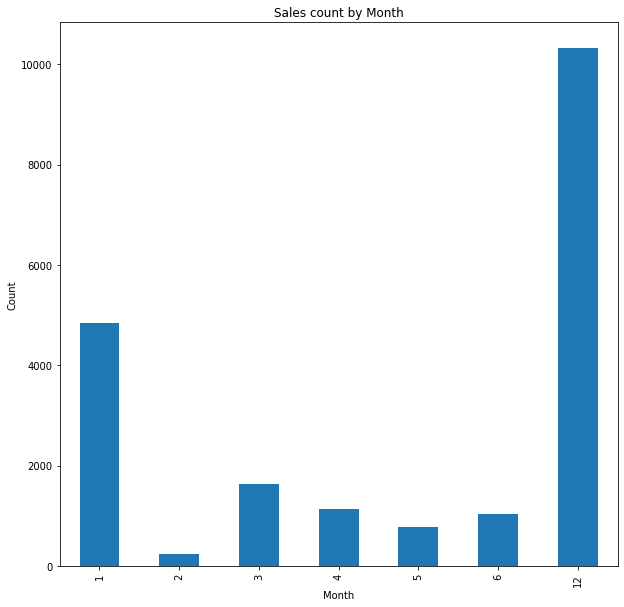

In [30]:
#plotting sales count per month
plt.figure(figsize=(10,10))
print(df1.groupby('crawl_month')['crawl_month'].count())
df1.groupby('crawl_month')['crawl_month'].count().plot(kind='bar')
plt.title('Sales count by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [31]:
df1.crawl_year.unique()

array([2016, 2015])

Text(0, 0.5, 'Count')

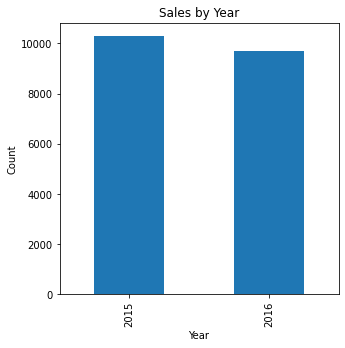

In [32]:
#plotting sales count per year
plt.figure(figsize=(5,5))
df1.groupby('crawl_year')['crawl_year'].count().plot(kind='bar')
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Count')

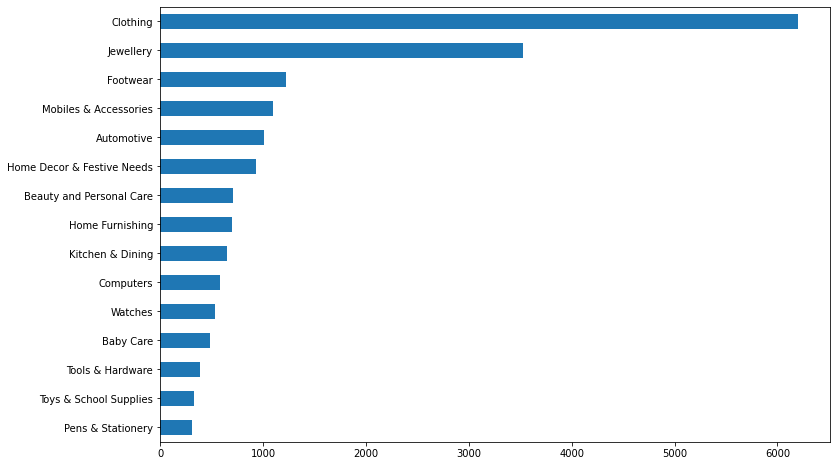

In [33]:
#plotting the items
plt.figure(figsize=(12,8))
df1.groupby('MainCategory')['MainCategory'].count().sort_values(ascending=False)[:15]
df1['MainCategory'].value_counts()[:15].sort_values(ascending=True).plot(kind='barh')

In [34]:
df1['discount_%']=round(((df1['retail_price']-df1['discounted_price'])/df1['retail_price'])*100,1)

In [35]:
main_cat_disc=pd.DataFrame(df1.groupby('MainCategory').agg({'discount_%':[(np.mean)],'MainCategory':['count']}))

In [36]:
main_cat_disc.head()
main_cat_disc.columns=['_'.join(col) for col in main_cat_disc.columns]

In [37]:
#Categorizing MainCategory in terms of discount
MainCategoryDiscount = main_cat_disc.sort_values(by=['MainCategory_count'],ascending=False)[:20]

In [38]:
MainCategoryDiscount

,discount_%_mean,MainCategory_count
MainCategory,,
Clothing,33.479961,6198
Jewellery,28.263523,3531
Footwear,22.822657,1227
Mobiles & Accessories,40.821747,1099
Automotive,45.316206,1012
Home Decor & Festive Needs,23.335737,929
Beauty and Personal Care,0.993803,710
Home Furnishing,24.138143,700
Kitchen & Dining,31.348686,647


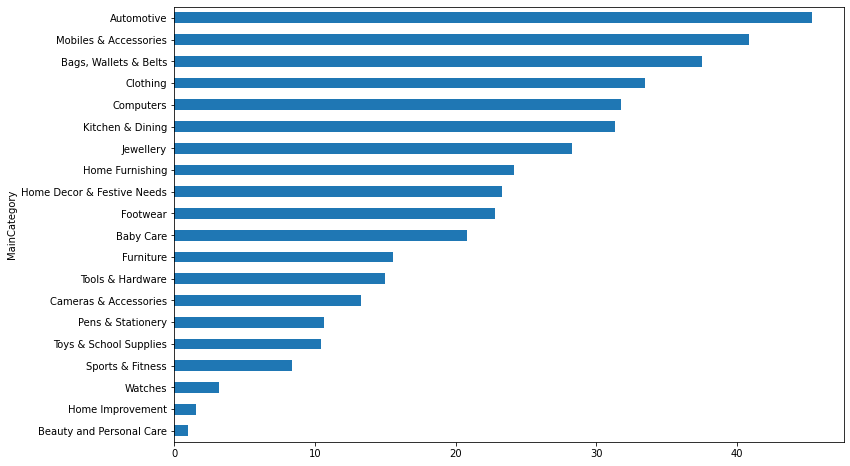

In [39]:
plt.figure(figsize=(12,8))
MainCategoryDiscount['discount_%_mean'].sort_values(ascending=True)[:20].plot(kind='barh')

## To get the desired output (as mentioned in the assignment), 2 different methods have been applied:
## Method 1: Simple Merging of the 2 dataframes have been performed (as both the datasets have very similar columns and the order of products are exactly the same in the datasets)
## Method 2: Assuming the order of products to be different in the two datasets, performed feature engineering using NLP to create a "Tag Vector" and further converted it into a vector using 2 different techniques : 1) Bag Of Words (Count Vectorizer) and 2) TF-IDF approach. Then the tag vector is used to calculate similarity score using cosine similarity.
               

# Method 1

## It can be observed that both the datasets have exactly same order for all the products and the columns are also very similar. The only difference is in prices of the two datasets.

In [40]:
#Merging the two dataframes
df3=df1.merge(df2,on='uniq_id')
df3.head(10)

,uniq_id,crawl_timestamp_x,product_url_x,product_name_x,product_category_tree_x,pid_x,retail_price_x,discounted_price_x,image_x,is_FK_Advantage_product_x,...,pid_y,retail_price_y,discounted_price_y,image_y,is_FK_Advantage_product_y,description_y,product_rating_y,overall_rating_y,brand_y,product_specifications_y
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982.0,438.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32143.0,29121.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,991.0,551.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,...,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,694.0,325.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,...,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,208.0,258.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,...,PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23+00:00,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,427.0,473.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,...,PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name..."
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1198.0,602.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,...,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,

In [41]:
df3.shape

(20000, 33)

In [42]:
df3.columns

Index(['uniq_id', 'crawl_timestamp_x', 'product_url_x', 'product_name_x',
       'product_category_tree_x', 'pid_x', 'retail_price_x',
       'discounted_price_x', 'image_x', 'is_FK_Advantage_product_x',
       'description_x', 'product_rating_x', 'overall_rating_x', 'brand_x',
       'product_specifications_x', 'crawl_year', 'crawl_month', 'MainCategory',
       'discount_%', 'crawl_timestamp_y', 'product_url_y', 'product_name_y',
       'product_category_tree_y', 'pid_y', 'retail_price_y',
       'discounted_price_y', 'image_y', 'is_FK_Advantage_product_y',
       'description_y', 'product_rating_y', 'overall_rating_y', 'brand_y',
       'product_specifications_y'],
      dtype='object')

In [43]:
df3.isna().sum()

uniq_id                         0
crawl_timestamp_x               0
product_url_x                   0
product_name_x                  0
product_category_tree_x         0
pid_x                           0
retail_price_x                  0
discounted_price_x              0
image_x                         3
is_FK_Advantage_product_x       0
description_x                   2
product_rating_x                0
overall_rating_x                0
brand_x                      5864
product_specifications_x       14
crawl_year                      0
crawl_month                     0
MainCategory                    0
discount_%                      0
crawl_timestamp_y               0
product_url_y                   0
product_name_y                  0
product_category_tree_y         0
pid_y                           0
retail_price_y                  0
discounted_price_y              0
image_y                         3
is_FK_Advantage_product_y       0
description_y                   2
product_rating

In [44]:
#Creating new dataframe according to the desired output
df_final=pd.DataFrame()
df_final['Product name in Flipkart']=df3['product_name_y']
df_final['Retail Price in Flipkart']=df3['retail_price_y']
df_final['Discounted Price in Flipkart']=df3['discounted_price_y']
df_final['Product name in Amazon']=df3['product_name_x']
df_final['Retail Price in Amazon']=df3['retail_price_x']
df_final['Discounted Price in Amazon']=df3['discounted_price_x']

In [45]:
df_final.head(10)

,Product name in Flipkart,Retail Price in Flipkart,Discounted Price in Flipkart,Product name in Amazon,Retail Price in Amazon,Discounted Price in Amazon
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,Alisha Solid Women's Cycling Shorts,982.0,438.0
1,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed,32143.0,29121.0
2,AW Bellies,999.0,499.0,AW Bellies,991.0,551.0
3,Alisha Solid Women's Cycling Shorts,699.0,267.0,Alisha Solid Women's Cycling Shorts,694.0,325.0
4,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,Sicons All Purpose Arnica Dog Shampoo,208.0,258.0
5,Eternal Gandhi Super Series Crystal Paper Weig...,430.0,430.0,Eternal Gandhi Super Series Crystal Paper Weig...,427.0,473.0
6,Alisha Solid Women's Cycling Shorts,1199.0,479.0,Alisha Solid Women's Cycling Shorts,1198.0,602.0
7,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed,32137.0,28664.0
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals",699.0,349.0,"dilli bazaaar Bellies, Corporate Casuals, Casuals",682.0,385.0
9,Alisha Solid Women's Cycling Shorts,1199.0,479.0,Alisha Solid Women's Cycling Shorts,1197.0,542.0


## Method 2
## Now let's preprocess the text to get the "Tag Vector" which would be used to calculate the similarity score. First the Amazon dataset has been processed.

In [46]:
df1.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,crawl_year,crawl_month,MainCategory,discount_%
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982.0,438.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,55.4
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32143.0,29121.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016,3,Furniture,9.4
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,991.0,551.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,Footwear,44.4
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,694.0,325.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,53.2
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,208.0,258.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016,3,Pet Supplies,-24.0


In [47]:
#dropping the unnecessary columns
df4=df1.drop(['crawl_timestamp',"product_url",'pid','image'
          ,'is_FK_Advantage_product','product_rating','overall_rating',
          'brand','crawl_year','crawl_month','MainCategory','discount_%','product_specifications'],axis='columns')

In [48]:
df4.head(10)

,uniq_id,product_name,product_category_tree,retail_price,discounted_price,description
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",982.0,438.0,Key Features of Alisha Solid Women's Cycling S...
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32143.0,29121.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",991.0,551.0,Key Features of AW Bellies Sandals Wedges Heel...
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",694.0,325.0,Key Features of Alisha Solid Women's Cycling S...
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",208.0,258.0,Specifications of Sicons All Purpose Arnica Do...
5,c2a17313954882c1dba461863e98adf2,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",427.0,473.0,Key Features of Eternal Gandhi Super Series Cr...
6,ce5a6818f7707e2cb61fdcdbba61f5ad,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",1198.0,602.0,Key Features of Alisha Solid Women's Cycling S...
7,8542703ca9e6ebdf6d742638dfb1f2ca,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32137.0,28664.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
8,29c8d290caa451f97b1c32df64477a2c,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",682.0,385.0,"Key Features of dilli bazaaar Bellies, Corpora..."
9,4044c0ac52c1ee4b28777417651faf42,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",1197.0,542.0,Key Features of Alisha Solid Women's Cycling S...


In [49]:
df4.product_category_tree[0].strip('[""]')

"Clothing >> Women's Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women's Cycling Shorts"

In [50]:
#selecting the top three categories 
df4.product_category_tree[0].strip('[""]').split('>>')[0:3]

['Clothing ', " Women's Clothing ", ' Lingerie, Sleep & Swimwear ']

In [51]:
df4['Category'] = df4['product_category_tree'].apply(lambda x: x.strip('[""]').split('>>')[0:3])

In [52]:
df4.iloc[1][6]

['Furniture ', ' Living Room Furniture ', ' Sofa Beds & Futons ']

In [53]:
df4.Category

0        [Clothing ,  Women's Clothing ,  Lingerie, Sle...
1        [Furniture ,  Living Room Furniture ,  Sofa Be...
2            [Footwear ,  Women's Footwear ,  Ballerinas ]
3        [Clothing ,  Women's Clothing ,  Lingerie, Sle...
4          [Pet Supplies ,  Grooming ,  Skin & Coat Care ]
                               ...                        
19995        [Baby Care ,  Baby & Kids Gifts ,  Stickers ]
19996        [Baby Care ,  Baby & Kids Gifts ,  Stickers ]
19997        [Baby Care ,  Baby & Kids Gifts ,  Stickers ]
19998        [Baby Care ,  Baby & Kids Gifts ,  Stickers ]
19999        [Baby Care ,  Baby & Kids Gifts ,  Stickers ]
Name: Category, Length: 20000, dtype: object

In [54]:
def to_list(object):
    list=[]
    list=str(object).split()
    return list

In [55]:
#removing all special characters from name
df4['product_name'] =df4['product_name'].str.replace('[^\w\s]','')
df4.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,uniq_id,product_name,product_category_tree,retail_price,discounted_price,description,Category
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Womens Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",982.0,438.0,Key Features of Alisha Solid Women's Cycling S...,"[Clothing , Women's Clothing , Lingerie, Sle..."
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32143.0,29121.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,"[Furniture , Living Room Furniture , Sofa Be..."
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",991.0,551.0,Key Features of AW Bellies Sandals Wedges Heel...,"[Footwear , Women's Footwear , Ballerinas ]"
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Womens Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",694.0,325.0,Key Features of Alisha Solid Women's Cycling S...,"[Clothing , Women's Clothing , Lingerie, Sle..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",208.0,258.0,Specifications of Sicons All Purpose Arnica Do...,"[Pet Supplies , Grooming , Skin & Coat Care ]"


In [56]:
#removing all special characters from description
df4['description'] = df4['description'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [57]:
df4.head()

,uniq_id,product_name,product_category_tree,retail_price,discounted_price,description,Category
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Womens Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",982.0,438.0,Key Features of Alisha Solid Womens Cycling Sh...,"[Clothing , Women's Clothing , Lingerie, Sle..."
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32143.0,29121.0,FabHomeDecor Fabric Double Sofa Bed Finish Col...,"[Furniture , Living Room Furniture , Sofa Be..."
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",991.0,551.0,Key Features of AW Bellies Sandals Wedges Heel...,"[Footwear , Women's Footwear , Ballerinas ]"
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Womens Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",694.0,325.0,Key Features of Alisha Solid Womens Cycling Sh...,"[Clothing , Women's Clothing , Lingerie, Sle..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",208.0,258.0,Specifications of Sicons All Purpose Arnica Do...,"[Pet Supplies , Grooming , Skin & Coat Care ]"


In [58]:
df4.head()

,uniq_id,product_name,product_category_tree,retail_price,discounted_price,description,Category
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Womens Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",982.0,438.0,Key Features of Alisha Solid Womens Cycling Sh...,"[Clothing , Women's Clothing , Lingerie, Sle..."
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32143.0,29121.0,FabHomeDecor Fabric Double Sofa Bed Finish Col...,"[Furniture , Living Room Furniture , Sofa Be..."
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",991.0,551.0,Key Features of AW Bellies Sandals Wedges Heel...,"[Footwear , Women's Footwear , Ballerinas ]"
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Womens Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",694.0,325.0,Key Features of Alisha Solid Womens Cycling Sh...,"[Clothing , Women's Clothing , Lingerie, Sle..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",208.0,258.0,Specifications of Sicons All Purpose Arnica Do...,"[Pet Supplies , Grooming , Skin & Coat Care ]"


In [59]:
#converting to a list of words
df4.product_name=df4.product_name.apply(to_list)
df4.description=df4.description.apply(to_list)

In [60]:
df4.head()

,uniq_id,product_name,product_category_tree,retail_price,discounted_price,description,Category
0,c2d766ca982eca8304150849735ffef9,"[Alisha, Solid, Womens, Cycling, Shorts]","[""Clothing >> Women's Clothing >> Lingerie, Sl...",982.0,438.0,"[Key, Features, of, Alisha, Solid, Womens, Cyc...","[Clothing , Women's Clothing , Lingerie, Sle..."
1,7f7036a6d550aaa89d34c77bd39a5e48,"[FabHomeDecor, Fabric, Double, Sofa, Bed]","[""Furniture >> Living Room Furniture >> Sofa B...",32143.0,29121.0,"[FabHomeDecor, Fabric, Double, Sofa, Bed, Fini...","[Furniture , Living Room Furniture , Sofa Be..."
2,f449ec65dcbc041b6ae5e6a32717d01b,"[AW, Bellies]","[""Footwear >> Women's Footwear >> Ballerinas >...",991.0,551.0,"[Key, Features, of, AW, Bellies, Sandals, Wedg...","[Footwear , Women's Footwear , Ballerinas ]"
3,0973b37acd0c664e3de26e97e5571454,"[Alisha, Solid, Womens, Cycling, Shorts]","[""Clothing >> Women's Clothing >> Lingerie, Sl...",694.0,325.0,"[Key, Features, of, Alisha, Solid, Womens, Cyc...","[Clothing , Women's Clothing , Lingerie, Sle..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,"[Sicons, All, Purpose, Arnica, Dog, Shampoo]","[""Pet Supplies >> Grooming >> Skin & Coat Care...",208.0,258.0,"[Specifications, of, Sicons, All, Purpose, Arn...","[Pet Supplies , Grooming , Skin & Coat Care ]"


In [61]:
#creating the required tag vector
df4['tags']=df4['product_name']+df4['Category']+df4['description']
df4.drop(['product_name','description','Category','product_category_tree'],axis='columns',inplace=True)

In [62]:
df4.head()

,uniq_id,retail_price,discounted_price,tags
0,c2d766ca982eca8304150849735ffef9,982.0,438.0,"[Alisha, Solid, Womens, Cycling, Shorts, Cloth..."
1,7f7036a6d550aaa89d34c77bd39a5e48,32143.0,29121.0,"[FabHomeDecor, Fabric, Double, Sofa, Bed, Furn..."
2,f449ec65dcbc041b6ae5e6a32717d01b,991.0,551.0,"[AW, Bellies, Footwear , Women's Footwear , ..."
3,0973b37acd0c664e3de26e97e5571454,694.0,325.0,"[Alisha, Solid, Womens, Cycling, Shorts, Cloth..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,208.0,258.0,"[Sicons, All, Purpose, Arnica, Dog, Shampoo, P..."


In [63]:
df4.iloc[0][3]

['Alisha',
 'Solid',
 'Womens',
 'Cycling',
 'Shorts',
 'Clothing ',
 " Women's Clothing ",
 ' Lingerie, Sleep & Swimwear ',
 'Key',
 'Features',
 'of',
 'Alisha',
 'Solid',
 'Womens',
 'Cycling',
 'Shorts',
 'Cotton',
 'Lycra',
 'Navy',
 'Red',
 'NavySpecifications',
 'of',
 'Alisha',
 'Solid',
 'Womens',
 'Cycling',
 'Shorts',
 'Shorts',
 'Details',
 'Number',
 'of',
 'Contents',
 'in',
 'Sales',
 'Package',
 'Pack',
 'of',
 '3',
 'Fabric',
 'Cotton',
 'Lycra',
 'Type',
 'Cycling',
 'Shorts',
 'General',
 'Details',
 'Pattern',
 'Solid',
 'Ideal',
 'For',
 'Womens',
 'Fabric',
 'Care',
 'Gentle',
 'Machine',
 'Wash',
 'in',
 'Lukewarm',
 'Water',
 'Do',
 'Not',
 'Bleach',
 'Additional',
 'Details',
 'Style',
 'Code',
 'ALTHT_3P_21',
 'In',
 'the',
 'Box',
 '3',
 'shorts']

In [64]:
df4.tags=df4.tags.apply(lambda x:" ".join(x))

In [65]:
# using count vectorizer to convert the text into word vectors
cv=CountVectorizer(max_features=5000,stop_words="english")

In [66]:
df4.tags=df4.tags.apply(lambda x:x.lower())

In [67]:
#applying stemming
ps=PorterStemmer()

In [68]:
def stem(text):
    L=[]
    for i in text.split():
        L.append(ps.stem(i))
        
        
    string=" ".join(L)    
    return string

In [69]:
df4.tags=df4.tags.apply(stem)

In [70]:
df4.head(10)

,uniq_id,retail_price,discounted_price,tags
0,c2d766ca982eca8304150849735ffef9,982.0,438.0,alisha solid women cycl short cloth women' clo...
1,7f7036a6d550aaa89d34c77bd39a5e48,32143.0,29121.0,fabhomedecor fabric doubl sofa bed furnitur li...
2,f449ec65dcbc041b6ae5e6a32717d01b,991.0,551.0,aw belli footwear women' footwear ballerina ke...
3,0973b37acd0c664e3de26e97e5571454,694.0,325.0,alisha solid women cycl short cloth women' clo...
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,208.0,258.0,sicon all purpos arnica dog shampoo pet suppli...
5,c2a17313954882c1dba461863e98adf2,427.0,473.0,etern gandhi super seri crystal paper weight w...
6,ce5a6818f7707e2cb61fdcdbba61f5ad,1198.0,602.0,alisha solid women cycl short cloth women' clo...
7,8542703ca9e6ebdf6d742638dfb1f2ca,32137.0,28664.0,fabhomedecor fabric doubl sofa bed furnitur li...
8,29c8d290caa451f97b1c32df64477a2c,682.0,385.0,dilli bazaaar belli corpor casual casual footw...
9,4044c0ac52c1ee4b28777417651faf42,1197.0,542.0,alisha solid women cycl short cloth women' clo...


In [71]:
df4.iloc[0][3]

"alisha solid women cycl short cloth women' cloth lingerie, sleep & swimwear key featur of alisha solid women cycl short cotton lycra navi red navyspecif of alisha solid women cycl short short detail number of content in sale packag pack of 3 fabric cotton lycra type cycl short gener detail pattern solid ideal for women fabric care gentl machin wash in lukewarm water do not bleach addit detail style code altht_3p_21 in the box 3 short"

In [72]:
#removing special characters
df4['tags'] =df4['tags'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [73]:
df4.iloc[0][3]

'alisha solid women cycl short cloth women cloth lingerie sleep  swimwear key featur of alisha solid women cycl short cotton lycra navi red navyspecif of alisha solid women cycl short short detail number of content in sale packag pack of 3 fabric cotton lycra type cycl short gener detail pattern solid ideal for women fabric care gentl machin wash in lukewarm water do not bleach addit detail style code altht_3p_21 in the box 3 short'

In [74]:
#creating the tag vector of amazon dataset
tag_vector_amz=cv.fit_transform(df4.tags).toarray()
tag_vector_amz

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [75]:
tag_vector_amz.shape

(20000, 5000)

In [76]:
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '001',
 '005',
 '01',
 '011',
 '02',
 '025',
 '03',
 '04',
 '05',
 '07',
 '08',
 '09',
 '098',
 '0specif',
 '10',
 '100',
 '1000',
 '10000',
 '10000mah',
 '101',
 '1016',
 '1049',
 '105',
 '1050',
 '105cm',
 '108',
 '1080p',
 '1095',
 '1099',
 '11',
 '110',
 '1100',
 '110db',
 '1119',
 '112',
 '1149',
 '115',
 '1150',
 '1195',
 '1199',
 '12',
 '120',
 '1200',
 '120cm',
 '121',
 '122',
 '1224',
 '1249',
 '125',
 '1250',
 '127',
 '129',
 '1295',
 '1299',
 '12v',
 '12v18',
 '12w',
 '13',
 '130',
 '1300',
 '132',
 '133',
 '1332',
 '1349',
 '135',
 '1350',
 '135cm',
 '1397',
 '1399',
 '14',
 '140',
 '1400',
 '141',
 '144',
 '1449',
 '145',
 '149',
 '1495',
 '1499',
 '14k',
 '15',
 '150',
 '1500',
 '150cm',
 '152',
 '1524',
 '154',
 '155',
 '156',
 '159',
 '1595',
 '1599',
 '16',
 '160',
 '1600',
 '165',
 '1685',
 '169',
 '1695',
 '1699',
 '16a',
 '17',
 '170',
 '1700',
 '1701859mm',
 '1749',
 '175',
 '1750',
 '176',
 '1778',
 '179',
 '1795',
 '1799',
 '18',
 '180',
 '1800',
 '182',


## Next, did the same preprocessing to create the tag vector for Flipkart dataset.

In [77]:
df2.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [78]:
#dropping the unnecessary columns
df5=df2.drop(['crawl_timestamp',"product_url",'pid','image'
          ,'is_FK_Advantage_product','product_rating','overall_rating',
          'brand','product_specifications'],axis='columns')

In [79]:
df5.head(10)

,uniq_id,product_name,product_category_tree,retail_price,discounted_price,description
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,Key Features of Alisha Solid Women's Cycling S...
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,Key Features of AW Bellies Sandals Wedges Heel...
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,Key Features of Alisha Solid Women's Cycling S...
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,Specifications of Sicons All Purpose Arnica Do...
5,c2a17313954882c1dba461863e98adf2,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",430.0,430.0,Key Features of Eternal Gandhi Super Series Cr...
6,ce5a6818f7707e2cb61fdcdbba61f5ad,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",1199.0,479.0,Key Features of Alisha Solid Women's Cycling S...
7,8542703ca9e6ebdf6d742638dfb1f2ca,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
8,29c8d290caa451f97b1c32df64477a2c,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",699.0,349.0,"Key Features of dilli bazaaar Bellies, Corpora..."
9,4044c0ac52c1ee4b28777417651faf42,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",1199.0,479.0,Key Features of Alisha Solid Women's Cycling S...


In [80]:
#selecting the top three categories
df5.product_category_tree[0].strip('[""]')

"Clothing >> Women's Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women's Cycling Shorts"

In [81]:
df5.product_category_tree[0].strip('[""]').split('>>')[0:3]

['Clothing ', " Women's Clothing ", ' Lingerie, Sleep & Swimwear ']

In [82]:
df5['Category'] = df5['product_category_tree'].apply(lambda x: x.strip('[""]').split('>>')[0:3])

In [83]:
df5.iloc[1][6]

['Furniture ', ' Living Room Furniture ', ' Sofa Beds & Futons ']

In [84]:
#removing special characters from name
df5['product_name'] =df5['product_name'].str.replace('[^\w\s]','')
df5.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,uniq_id,product_name,product_category_tree,retail_price,discounted_price,description,Category
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Womens Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,Key Features of Alisha Solid Women's Cycling S...,"[Clothing , Women's Clothing , Lingerie, Sle..."
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,"[Furniture , Living Room Furniture , Sofa Be..."
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,Key Features of AW Bellies Sandals Wedges Heel...,"[Footwear , Women's Footwear , Ballerinas ]"
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Womens Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,Key Features of Alisha Solid Women's Cycling S...,"[Clothing , Women's Clothing , Lingerie, Sle..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,Specifications of Sicons All Purpose Arnica Do...,"[Pet Supplies , Grooming , Skin & Coat Care ]"


In [85]:
#removing special characters from description
df5['description'] = df5['description'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [86]:
df5.head()

,uniq_id,product_name,product_category_tree,retail_price,discounted_price,description,Category
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Womens Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,Key Features of Alisha Solid Womens Cycling Sh...,"[Clothing , Women's Clothing , Lingerie, Sle..."
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed Finish Col...,"[Furniture , Living Room Furniture , Sofa Be..."
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,Key Features of AW Bellies Sandals Wedges Heel...,"[Footwear , Women's Footwear , Ballerinas ]"
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Womens Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,Key Features of Alisha Solid Womens Cycling Sh...,"[Clothing , Women's Clothing , Lingerie, Sle..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,Specifications of Sicons All Purpose Arnica Do...,"[Pet Supplies , Grooming , Skin & Coat Care ]"


In [87]:
df5.head()

,uniq_id,product_name,product_category_tree,retail_price,discounted_price,description,Category
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Womens Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,Key Features of Alisha Solid Womens Cycling Sh...,"[Clothing , Women's Clothing , Lingerie, Sle..."
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed Finish Col...,"[Furniture , Living Room Furniture , Sofa Be..."
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,Key Features of AW Bellies Sandals Wedges Heel...,"[Footwear , Women's Footwear , Ballerinas ]"
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Womens Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,Key Features of Alisha Solid Womens Cycling Sh...,"[Clothing , Women's Clothing , Lingerie, Sle..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,Specifications of Sicons All Purpose Arnica Do...,"[Pet Supplies , Grooming , Skin & Coat Care ]"


In [88]:
#converting to a list of words
df5.product_name=df5.product_name.apply(to_list)
df5.description=df5.description.apply(to_list)

In [89]:
df5.head()

,uniq_id,product_name,product_category_tree,retail_price,discounted_price,description,Category
0,c2d766ca982eca8304150849735ffef9,"[Alisha, Solid, Womens, Cycling, Shorts]","[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,"[Key, Features, of, Alisha, Solid, Womens, Cyc...","[Clothing , Women's Clothing , Lingerie, Sle..."
1,7f7036a6d550aaa89d34c77bd39a5e48,"[FabHomeDecor, Fabric, Double, Sofa, Bed]","[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,"[FabHomeDecor, Fabric, Double, Sofa, Bed, Fini...","[Furniture , Living Room Furniture , Sofa Be..."
2,f449ec65dcbc041b6ae5e6a32717d01b,"[AW, Bellies]","[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,"[Key, Features, of, AW, Bellies, Sandals, Wedg...","[Footwear , Women's Footwear , Ballerinas ]"
3,0973b37acd0c664e3de26e97e5571454,"[Alisha, Solid, Womens, Cycling, Shorts]","[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,"[Key, Features, of, Alisha, Solid, Womens, Cyc...","[Clothing , Women's Clothing , Lingerie, Sle..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,"[Sicons, All, Purpose, Arnica, Dog, Shampoo]","[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,"[Specifications, of, Sicons, All, Purpose, Arn...","[Pet Supplies , Grooming , Skin & Coat Care ]"


In [90]:
#creating the tag vector
df5['tags']=df5['product_name']+df5['Category']+df5['description']
df5.drop(['product_name','description','Category','product_category_tree'],axis='columns',inplace=True)

In [91]:
df5.head()

,uniq_id,retail_price,discounted_price,tags
0,c2d766ca982eca8304150849735ffef9,999.0,379.0,"[Alisha, Solid, Womens, Cycling, Shorts, Cloth..."
1,7f7036a6d550aaa89d34c77bd39a5e48,32157.0,22646.0,"[FabHomeDecor, Fabric, Double, Sofa, Bed, Furn..."
2,f449ec65dcbc041b6ae5e6a32717d01b,999.0,499.0,"[AW, Bellies, Footwear , Women's Footwear , ..."
3,0973b37acd0c664e3de26e97e5571454,699.0,267.0,"[Alisha, Solid, Womens, Cycling, Shorts, Cloth..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,220.0,210.0,"[Sicons, All, Purpose, Arnica, Dog, Shampoo, P..."


In [92]:
df5.iloc[0][3]

['Alisha',
 'Solid',
 'Womens',
 'Cycling',
 'Shorts',
 'Clothing ',
 " Women's Clothing ",
 ' Lingerie, Sleep & Swimwear ',
 'Key',
 'Features',
 'of',
 'Alisha',
 'Solid',
 'Womens',
 'Cycling',
 'Shorts',
 'Cotton',
 'Lycra',
 'Navy',
 'Red',
 'NavySpecifications',
 'of',
 'Alisha',
 'Solid',
 'Womens',
 'Cycling',
 'Shorts',
 'Shorts',
 'Details',
 'Number',
 'of',
 'Contents',
 'in',
 'Sales',
 'Package',
 'Pack',
 'of',
 '3',
 'Fabric',
 'Cotton',
 'Lycra',
 'Type',
 'Cycling',
 'Shorts',
 'General',
 'Details',
 'Pattern',
 'Solid',
 'Ideal',
 'For',
 'Womens',
 'Fabric',
 'Care',
 'Gentle',
 'Machine',
 'Wash',
 'in',
 'Lukewarm',
 'Water',
 'Do',
 'Not',
 'Bleach',
 'Additional',
 'Details',
 'Style',
 'Code',
 'ALTHT_3P_21',
 'In',
 'the',
 'Box',
 '3',
 'shorts']

In [93]:
df5.tags=df5.tags.apply(lambda x:" ".join(x))

In [94]:
df5.tags=df5.tags.apply(lambda x:x.lower())

In [95]:
#applying stemming
df5.tags=df5.tags.apply(stem)

In [96]:
df5['tags'] =df5['tags'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [97]:
#removing special characters
df5.iloc[0][3]

'alisha solid women cycl short cloth women cloth lingerie sleep  swimwear key featur of alisha solid women cycl short cotton lycra navi red navyspecif of alisha solid women cycl short short detail number of content in sale packag pack of 3 fabric cotton lycra type cycl short gener detail pattern solid ideal for women fabric care gentl machin wash in lukewarm water do not bleach addit detail style code altht_3p_21 in the box 3 short'

In [98]:
#applying vectorization to the tag vector
tag_vector_fk=cv.fit_transform(df5.tags).toarray()
tag_vector_fk

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [99]:
tag_vector_fk.shape

(20000, 5000)

## Using Cosine Similarity, calculated the similarity score of the 2 datasets

In [100]:
similarity=cs(tag_vector_fk,tag_vector_amz)

In [101]:
similarity

array([[1.        , 0.07630823, 0.17931034, ..., 0.00958927, 0.00965384,
        0.00958927],
       [0.07630823, 1.        , 0.22701699, ..., 0.06896649, 0.06943091,
        0.06896649],
       [0.17931034, 0.22701699, 1.        , ..., 0.04794633, 0.0482692 ,
        0.04794633],
       ...,
       [0.00958927, 0.06896649, 0.04794633, ..., 1.        , 0.99331096,
        1.        ],
       [0.00965384, 0.06943091, 0.0482692 , ..., 0.99331096, 1.        ,
        0.99331096],
       [0.00958927, 0.06896649, 0.04794633, ..., 1.        , 0.99331096,
        1.        ]])

In [102]:
similarity.shape

(20000, 20000)

In [103]:
#using similarity score, matching the top 5 most similar items in amazon dataframe from flipkart dataframe
sorted(list(enumerate((similarity[0]))),reverse=True,key=lambda x:x[1])[0:5]

[(0, 1.0),
 (6, 0.9965694581570856),
 (9, 0.9896965653422092),
 (3, 0.9896253015904013),
 (13, 0.9862068965517241)]

## Next, will create a function that will match the Flipkart products with Amazon products and will compare the prices
## The flow is as follows (once the product name is fetched into the function): 
## Product Name --> index in Flipkart dataframe -->use index to calculate similarity score which is the index of the Amazon dataframe--> use that index to get the "uniq_id" of product--> create the required dataframe

In [104]:
def match(product):
    idx_fk=df2[df2.product_name==product].index[0]
    idx_amz=sorted(list(enumerate((similarity[idx_fk]))),reverse=True,key=lambda x:x[1])[0][0]
    product_id=df1.uniq_id.iloc[idx_amz]
    temp=df1[df1.uniq_id==product_id]
    temp2=temp.drop(['crawl_timestamp','product_url','product_category_tree','pid','image','is_FK_Advantage_product','description',
          'product_rating','overall_rating','brand','product_specifications','crawl_year','crawl_month','MainCategory','discount_%']
         ,axis='columns')
    temp3=df2[df2.uniq_id==product_id]
    temp3.drop(['crawl_timestamp','product_url','product_category_tree','pid','image','is_FK_Advantage_product','description',
          'product_rating','overall_rating','brand','product_specifications'],axis='columns',inplace=True)
    temp_final=temp3.merge(temp2,on='uniq_id')
    df_final=pd.DataFrame()
    df_final['Product name in Flipkart']=temp_final['product_name_x']
    df_final['Retail Price in Flipkart']=temp_final['retail_price_x']
    df_final['Discounted Price in Flipkart']=temp_final['discounted_price_x']
    df_final['Product name in Amazon']=temp_final['product_name_y']
    df_final['Retail Price in Amazon']=temp_final['retail_price_y']
    df_final['Discounted Price in Amazon']=temp_final['discounted_price_y']
    
    display(df_final)

In [105]:
match("FabHomeDecor Fabric Double Sofa Bed")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Product name in Flipkart,Retail Price in Flipkart,Discounted Price in Flipkart,Product name in Amazon,Retail Price in Amazon,Discounted Price in Amazon
0,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed,32143.0,29121.0


In [106]:
match("KAJCI Embroidered Women's Waistcoat")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Product name in Flipkart,Retail Price in Flipkart,Discounted Price in Flipkart,Product name in Amazon,Retail Price in Amazon,Discounted Price in Amazon
0,KAJCI Embroidered Women's Waistcoat,1200.0,699.0,KAJCI EMBROIDERED WOMEN'S WAISTCOAT,1183.0,822.0


## Hence the required dataframe is obtained and the prices are being compared as shown in the above two examples

## Next Tf-Idf approach is used to vectorize the tag vector. The main difference between Bag Of Words (Count Vectorizer) and Tf-Idf approach is that the latter not only focuses on the frequency of words present in the corpus but also provides the importance of the words.

In [107]:
tfd=TfidfVectorizer(stop_words='english',max_features=5000)

In [108]:
#creating the tag vector
tag_vector_amz_tfd=tfd.fit_transform(df4.tags).toarray()
tag_vector_fk_tfd=tfd.fit_transform(df5.tags).toarray()

In [109]:
#calculating similarity score using cosine similarity
similarity_tfd=cs(tag_vector_fk_tfd,tag_vector_amz_tfd)

In [110]:
similarity_tfd

array([[1.        , 0.02838307, 0.05310933, ..., 0.00401322, 0.00406172,
        0.00401322],
       [0.02838307, 1.        , 0.12650886, ..., 0.01036631, 0.01049158,
        0.01036631],
       [0.05310933, 0.12650886, 1.        , ..., 0.00944595, 0.00956009,
        0.00944595],
       ...,
       [0.00401322, 0.01036631, 0.00944595, ..., 1.        , 0.98806026,
        1.        ],
       [0.00406172, 0.01049158, 0.00956009, ..., 0.98806026, 1.        ,
        0.98806026],
       [0.00401322, 0.01036631, 0.00944595, ..., 1.        , 0.98806026,
        1.        ]])

In [111]:
#using similarity score (using Tf-Idf), matching the top 5 most similar items in amazon dataframe from flipkart dataframe
sorted(list(enumerate((similarity_tfd[0]))),reverse=True,key=lambda x:x[1])[0:5]

[(0, 1.0000000000000004),
 (6, 0.9979351304700372),
 (9, 0.9904541200290999),
 (3, 0.9899057285069851),
 (13, 0.9878355677336714)]

In [112]:
#creating the function (for matching) which will have the same flow as the previous function
def match_tfd(product):
    idx_fk=df2[df2.product_name==product].index[0]
    idx_amz=sorted(list(enumerate((similarity_tfd[idx_fk]))),reverse=True,key=lambda x:x[1])[0][0]
    product_id=df1.uniq_id.iloc[idx_amz]
    temp=df1[df1.uniq_id==product_id]
    temp2=temp.drop(['crawl_timestamp','product_url','product_category_tree','pid','image','is_FK_Advantage_product','description',
          'product_rating','overall_rating','brand','product_specifications','crawl_year','crawl_month','MainCategory','discount_%']
         ,axis='columns')
    temp3=df2[df2.uniq_id==product_id]
    temp3.drop(['crawl_timestamp','product_url','product_category_tree','pid','image','is_FK_Advantage_product','description',
          'product_rating','overall_rating','brand','product_specifications'],axis='columns',inplace=True)
    temp_final=temp3.merge(temp2,on='uniq_id')
    df_final=pd.DataFrame()
    df_final['Product name in Flipkart']=temp_final['product_name_x']
    df_final['Retail Price in Flipkart']=temp_final['retail_price_x']
    df_final['Discounted Price in Flipkart']=temp_final['discounted_price_x']
    df_final['Product name in Amazon']=temp_final['product_name_y']
    df_final['Retail Price in Amazon']=temp_final['retail_price_y']
    df_final['Discounted Price in Amazon']=temp_final['discounted_price_y']
    
    display(df_final)

In [113]:
match_tfd("AW Bellies")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Product name in Flipkart,Retail Price in Flipkart,Discounted Price in Flipkart,Product name in Amazon,Retail Price in Amazon,Discounted Price in Amazon
0,AW Bellies,999.0,499.0,AW Bellies,991.0,551.0


In [114]:
match_tfd("Angelfish Silk Potali Potli")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Product name in Flipkart,Retail Price in Flipkart,Discounted Price in Flipkart,Product name in Amazon,Retail Price in Amazon,Discounted Price in Amazon
0,Angelfish Silk Potali Potli,999.0,399.0,ANGELFISH SILK POTALI POTLI,983.0,482.0


## Hence we obtain the required dataframe using the TF-IDF approach as well!